In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
 colnames=['Gender', 'Age', 'Debt','Married','BankCustomer','EducationLevel', 'Ethnicity', 
    'YearsEmployed', 'PriorDefault','Employed', 'CreditScore','DriversLicense', 'Citizen',
    'ZipCode','Income','Approved']

In [6]:
data=pd.read_csv('D:\Credit card approval prediction\crx.data', names=colnames, header=None)
data.sample(5)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
12,a,38.25,6.000,u,g,k,v,1.000,t,f,0,t,g,00000,0,+
30,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,00168,0,+
448,b,31.25,1.125,u,g,ff,ff,0.000,f,t,1,f,g,00096,19,-
76,b,34.08,6.500,u,g,aa,v,0.125,t,f,0,t,g,00443,0,-
67,b,25.50,0.375,u,g,m,v,0.250,t,t,3,f,g,00260,15108,+


In [7]:
data.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


### Data Understanding

In [8]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

* No nulls observed

In [9]:
data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


### Handling Categorical Data

In [10]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))   

There are 12 categorical variables


In [11]:
data[categorical].head()

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
0,b,30.83,u,g,w,v,t,t,f,g,00202,+
1,a,58.67,u,g,q,h,t,t,f,g,00043,+
2,a,24.50,u,g,q,h,t,f,f,g,00280,+
3,b,27.83,u,g,w,v,t,t,t,g,00100,+
4,b,20.17,u,g,w,v,t,f,f,s,00120,+


In [12]:
# let's inspect at the number of labels for the different categorical variables

print('Number of categories in the variable Gender: {}'.format(
    len(data.Gender.unique())))
print('Number of categories in the variable Age: {}'.format(
    len(data.Age.unique())))
print('Number of categories in the variable Married: {}'.format(
    len(data.Married.unique())))
print('Number of categories in the variable BankCustomer: {}'.format(
    len(data.BankCustomer.unique())))
print('Number of categories in the variable EducationLevel: {}'.format(
    len(data.EducationLevel.unique())))
print('Number of categories in the variable Ethnicity: {}'.format(
    len(data.Ethnicity.unique())))
print('Number of categories in the variable PriorDefault: {}'.format(
    len(data.PriorDefault.unique())))
print('Number of categories in the variable Employed: {}'.format(
    len(data.Employed.unique())))
print('Number of categories in the variable DriversLicense: {}'.format(
    len(data.DriversLicense.unique())))
print('Number of categories in the variable Citizen: {}'.format(
    len(data.Citizen.unique())))
print('Number of categories in the target variable Approved: {}'.format(
    len(data.Approved.unique())))
print('Total number of customers in the Credit card approval dataset: {}'.format(len(data)))

Number of categories in the variable Gender: 3
Number of categories in the variable Age: 350
Number of categories in the variable Married: 4
Number of categories in the variable BankCustomer: 4
Number of categories in the variable EducationLevel: 15
Number of categories in the variable Ethnicity: 10
Number of categories in the variable PriorDefault: 2
Number of categories in the variable Employed: 2
Number of categories in the variable DriversLicense: 2
Number of categories in the variable Citizen: 3
Number of categories in the target variable Approved: 2
Total number of customers in the Credit card approval dataset: 690


In [13]:
print(data['Gender'].unique())
Gender= data['Gender'].value_counts()
Gender        # not sure what 'a' 'b' and '?' are

['b' 'a' '?']


b    468
a    210
?     12
Name: Gender, dtype: int64

In [14]:
print(data['Age'].unique())   # there is '?' in the values
Age= data['Age'].value_counts()

['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' '43.00' '22.33

In [15]:
data['Age'] = data['Age'].replace(to_replace = "?", value = 40)
Age= data['Age'].value_counts()
Age

40       12
22.67     9
20.42     7
23.58     6
24.50     6
20.67     6
18.83     6
19.17     6
22.50     6
25.00     6
33.17     5
27.67     5
23.00     5
23.25     5
23.08     5
27.83     5
27.25     4
22.08     4
41.17     4
29.50     4
22.92     4
24.58     4
26.17     4
25.17     4
26.67     4
32.33     4
23.50     4
24.75     4
20.00     4
35.17     4
         ..
52.17     1
36.08     1
20.25     1
22.33     1
41.75     1
60.58     1
37.58     1
30.42     1
50.08     1
16.17     1
48.33     1
48.25     1
32.83     1
47.17     1
69.50     1
57.83     1
44.83     1
80.25     1
41.92     1
57.58     1
73.42     1
17.42     1
36.00     1
26.33     1
20.33     1
52.42     1
15.75     1
33.92     1
56.75     1
18.75     1
Name: Age, Length: 350, dtype: int64

In [16]:
Age.dtype # after removing the '?' age is int now
print(data['Age'].unique())

['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' 40 '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' '43.00' '22.33'

In [17]:
# converting 'Age' object type to float 
data['Age']=pd.to_numeric(data['Age'])   
print(data.dtypes) 

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
Approved           object
dtype: object


In [18]:
print(data['Married'].unique())        # feature 'Married' and 'BankCustomer' has same values
Married= data['Married'].value_counts()
Married

['u' 'y' '?' 'l']


u    519
y    163
?      6
l      2
Name: Married, dtype: int64

In [19]:
print(data['BankCustomer'].unique())   # feature 'Married' and 'BankCustomer' has same values
BankCustomer= data['BankCustomer'].value_counts()
BankCustomer

['g' 'p' '?' 'gg']


g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64

In [20]:
print(data['EducationLevel'].unique())   # unkown values
EducationLevel= data['EducationLevel'].value_counts()
EducationLevel

['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64

In [21]:
print(data['PriorDefault'].unique())   # 't' can be previously defaulted, 'f' not defaulted prior
PriorDefault= data['PriorDefault'].value_counts()
PriorDefault

['t' 'f']


t    361
f    329
Name: PriorDefault, dtype: int64

In [22]:
# A simple and intuitive way to convert the feature to 0's and 1's might be
data['PriorDefault'] = data['PriorDefault'].replace(to_replace = "t", value = 1)
data['PriorDefault'] = data['PriorDefault'].replace(to_replace = "f", value = 0)
PriorDefault= data['PriorDefault'].value_counts()
PriorDefault

1    361
0    329
Name: PriorDefault, dtype: int64

In [23]:
print(data['Employed'].unique())   # 'f' can be unemployed and 't' can be employed
Employed= data['Employed'].value_counts()
Employed

['t' 'f']


f    395
t    295
Name: Employed, dtype: int64

In [24]:
# A simple and intuitive way to convert the feature to 0's and 1's might be
data['Employed'] = data['Employed'].replace(to_replace = "t", value = 1)
data['Employed'] = data['Employed'].replace(to_replace = "f", value = 0)
Employed= data['Employed'].value_counts()
Employed

0    395
1    295
Name: Employed, dtype: int64

In [25]:
print(data['Citizen'].unique())   # not sure what the values are
Citizen= data['Citizen'].value_counts()
Citizen

['g' 's' 'p']


g    625
s     57
p      8
Name: Citizen, dtype: int64

In [26]:
print(data['Approved'].unique())   # target
Approved= data['Approved'].value_counts()
Approved

['+' '-']


-    383
+    307
Name: Approved, dtype: int64

In [27]:
# A simple and intuitive way to convert the feature to 0's and 1's might be
data['Approved'] = data['Approved'].replace(to_replace = "+", value = 1)
data['Approved'] = data['Approved'].replace(to_replace = "-", value = 0)
Approved= data['Approved'].value_counts()
Approved

0    383
1    307
Name: Approved, dtype: int64

#### we can notice that the following Categorical features can be considered for our study, so the same are converted to int type:
* Age
* ProirDefault
* Employed

### Handling numerical features

In [28]:
numeric = [num for num in data.columns if data[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))

There are 8 numeric variables


In [29]:
data[numeric].head()

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,30.83,0.000,1.25,1,1,1,0,1
1,58.67,4.460,3.04,1,1,6,560,1
2,24.50,0.500,1.50,1,0,0,824,1
3,27.83,1.540,3.75,1,1,5,3,1
4,20.17,5.625,1.71,1,0,0,0,1


In [30]:
# let's visualise the values of the discrete variables 
# from all the numerical ones, those that contain a finite and small number of distinct values

discrete=[]
for var in numeric:
    if len(data[var].unique())<45:
        print (var, ' values: ', data[var].unique())
        discrete.append(var)
print('\n') 
print('There are {} discrete variables'.format(len(discrete)))

PriorDefault  values:  [1 0]
Employed  values:  [1 0]
CreditScore  values:  [ 1  6  0  5  7 10  3 17  2  9  8 15 11 12 40 23  4 20 67 14 16 13 19]
Approved  values:  [1 0]


There are 4 discrete variables


In [31]:
# let's visualise the values of the discrete variables
for var in discrete:
    print(var, ' values: ', data[var].unique())

PriorDefault  values:  [1 0]
Employed  values:  [1 0]
CreditScore  values:  [ 1  6  0  5  7 10  3 17  2  9  8 15 11 12 40 23  4 20 67 14 16 13 19]
Approved  values:  [1 0]


In [32]:
# seperating continous variables (only inputs)
continuous = [var for var in numeric if var not in discrete and var not in ['Approved']]
continuous

['Age', 'Debt', 'YearsEmployed', 'Income']

In [33]:
data.drop(data[['Gender','Married','Ethnicity',
          'EducationLevel','BankCustomer','DriversLicense','Citizen','ZipCode']], axis=1, inplace=True)
data.sample(3)
# retaining the relavent features and dropping the rest

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
271,32.33,2.50,1.25,0,0,0,0,0
379,33.58,0.25,4.00,0,0,0,0,0
450,40.00,3.00,7.00,0,0,0,1,0


### Data Visualization

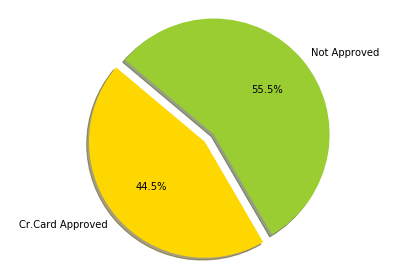

In [177]:
# Pie chart
labels = ['Cr.Card Approved', 'Not Approved']
sizes = [307, 383]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of customers')

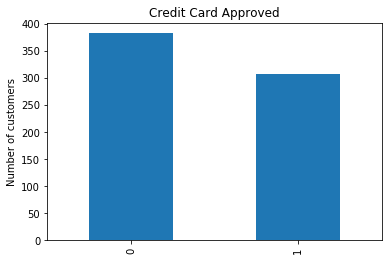

In [178]:
# target variable, with the number of credit card approved
# '+' means approved, '-' means not approved
fig = data['Approved'].value_counts().plot.bar()
fig.set_title('Credit Card Approved')
fig.set_ylabel('Number of customers')

* Observation: Its quite a balanced target

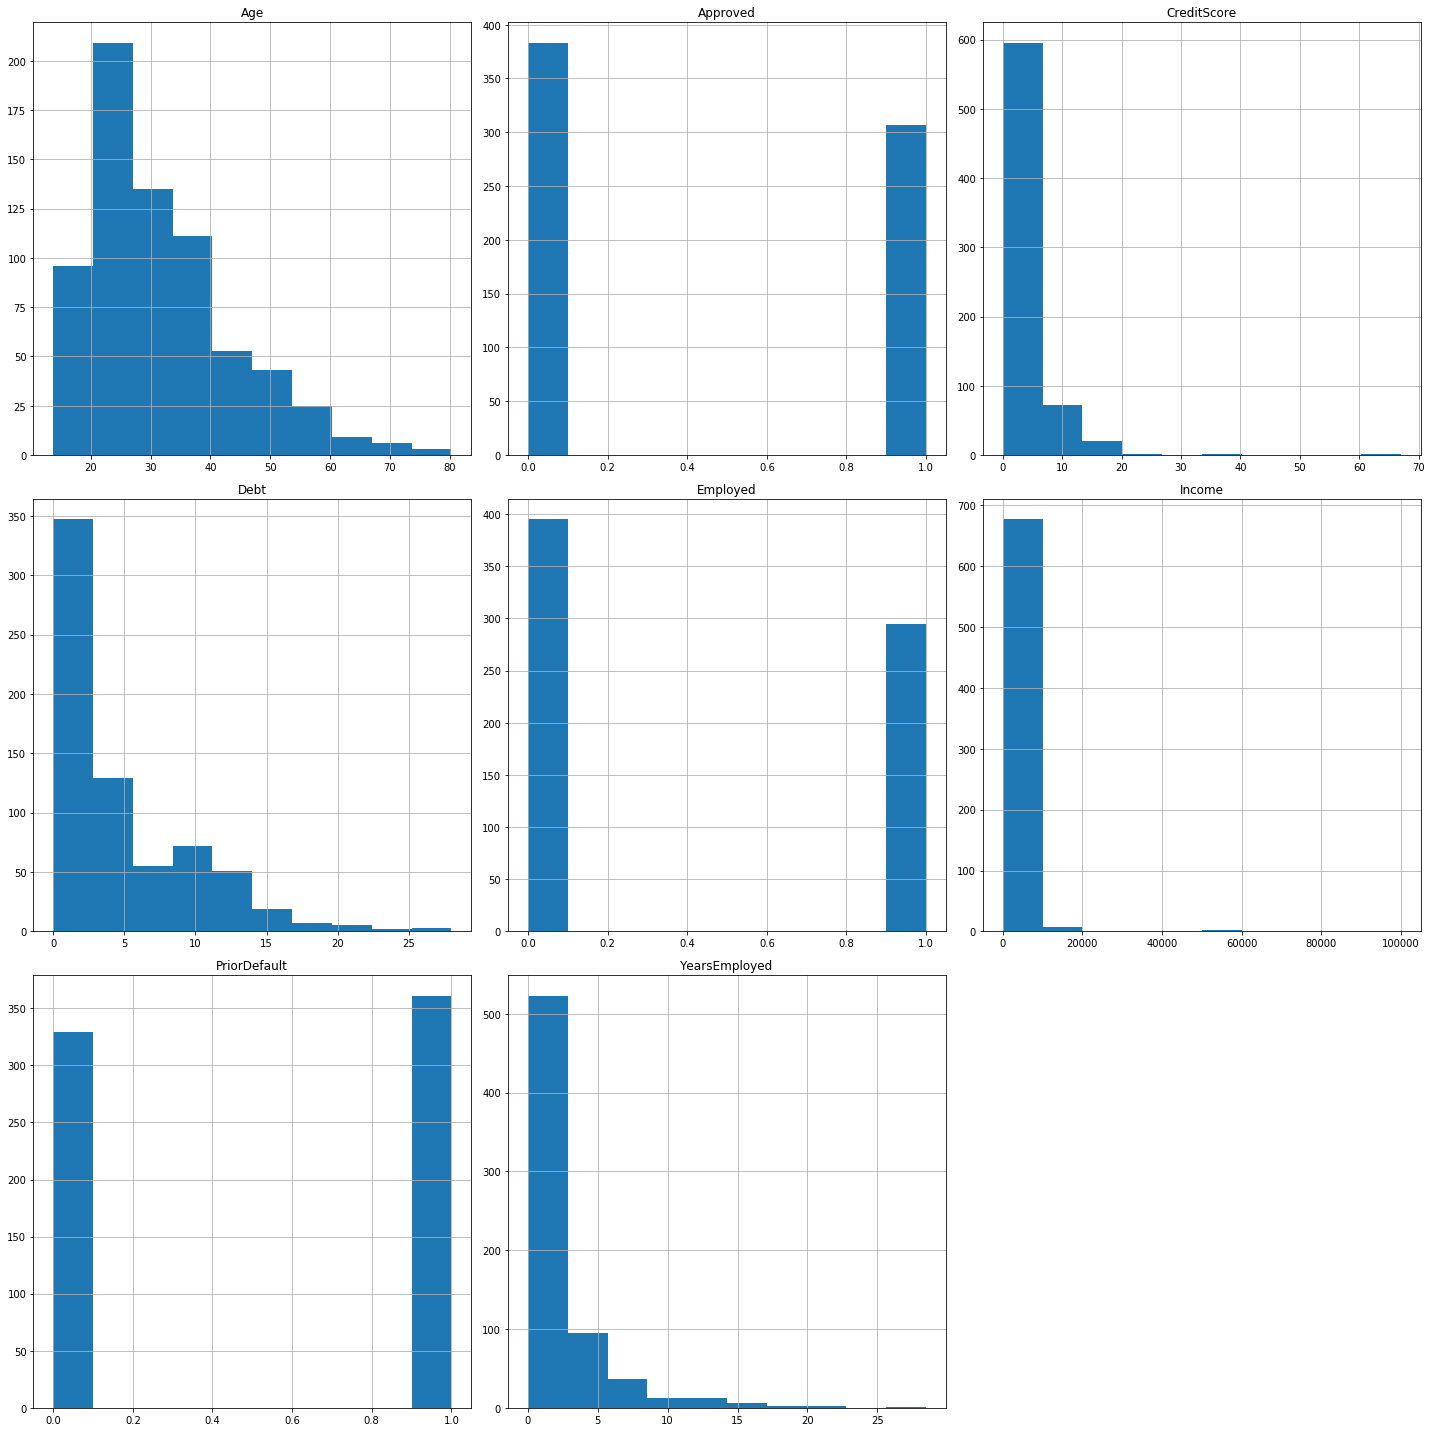

In [179]:
data.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

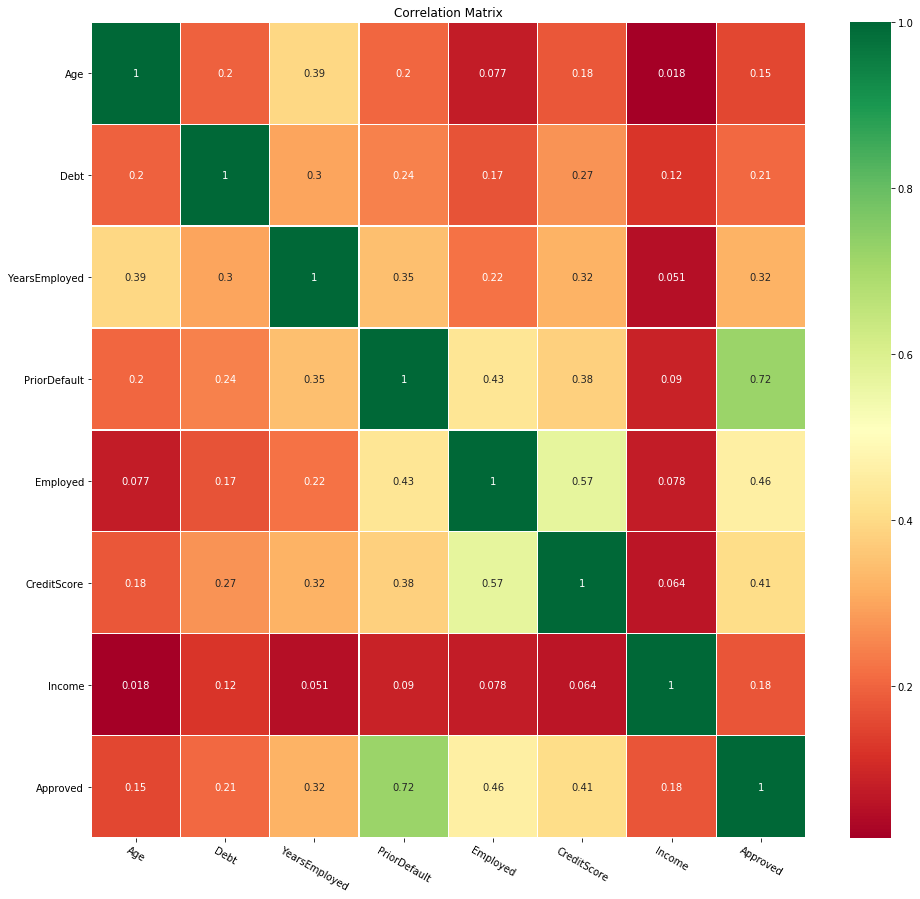

In [180]:
import seaborn as sns
corr = data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(16,15)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

* PriorDefault has +72% correlation for credit card to be approved 
* CreditScore has +57% correlation with customer being Employed

### Visualising the relationship plots of dependent and independent variables

Text(0, 0.5, 'Approved')

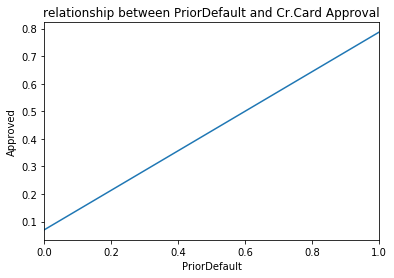

In [181]:
fig = plt.figure()
fig = data.groupby(['PriorDefault'])['Approved'].mean().plot()
fig.set_title('relationship between PriorDefault and Cr.Card Approval')
fig.set_ylabel('Approved')

Text(0, 0.5, 'Approved')

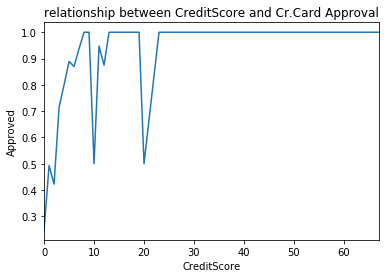

In [182]:
fig = plt.figure()
fig = data.groupby(['CreditScore'])['Approved'].mean().plot()
fig.set_title('relationship between CreditScore and Cr.Card Approval')
fig.set_ylabel('Approved')

Text(0, 0.5, 'Approved')

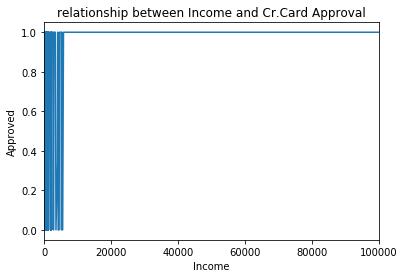

In [183]:
fig = plt.figure()
fig = data.groupby(['Income'])['Approved'].mean().plot()
fig.set_title('relationship between Income and Cr.Card Approval')
fig.set_ylabel('Approved')

Text(0, 0.5, 'Approved')

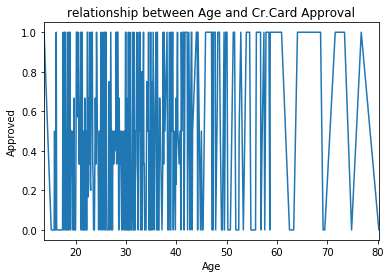

In [184]:
fig = plt.figure()
fig = data.groupby(['Age'])['Approved'].mean().plot()
fig.set_title('relationship between Age and Cr.Card Approval')
fig.set_ylabel('Approved')

Text(0, 0.5, 'Approved')

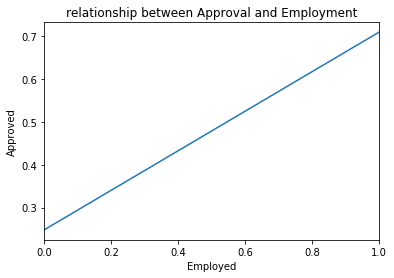

In [185]:
fig = plt.figure()
fig = data.groupby(['Employed'])['Approved'].mean().plot()
fig.set_title('relationship between Approval and Employment')
fig.set_ylabel('Approved')

### Outliers

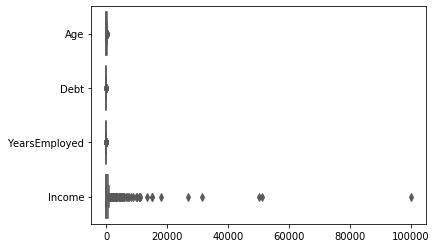

In [186]:
import seaborn as sns
#checking outliers

sns.boxplot(data=data[continuous], orient="h", palette="Set2")

* as the scale is difference cannot visualise the outliers in other features

In [187]:
# let's have a look at the most extreme outliers
data[data.Income>50000]

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
132,47.42,8.0,6.5,1,1,6,51100,1
317,17.50,22.0,0.0,0,0,0,100000,1


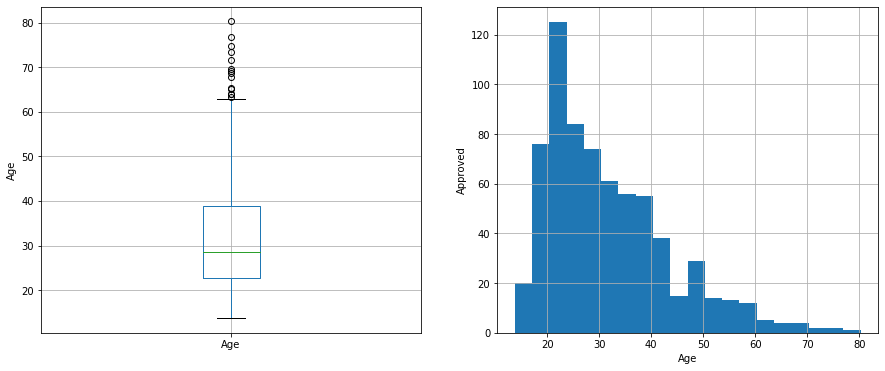

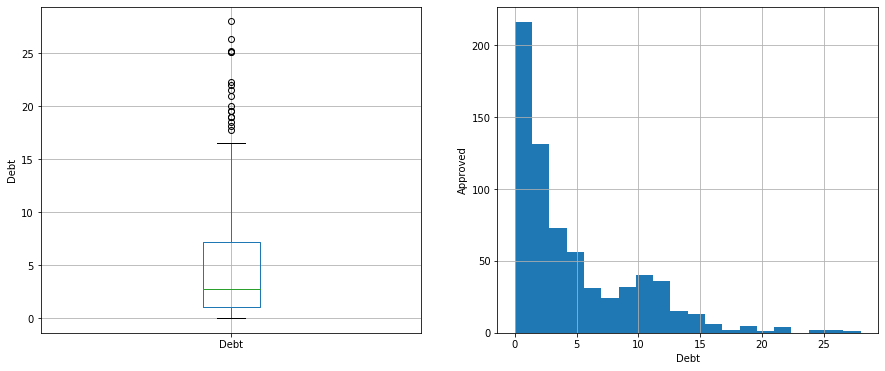

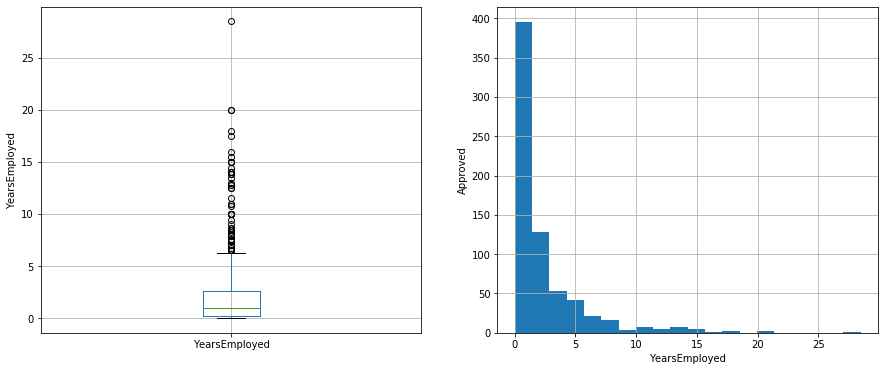

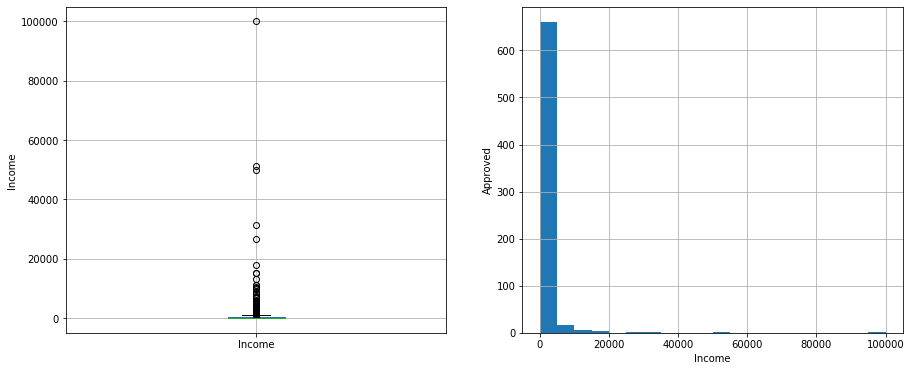

In [188]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Approved')
    fig.set_xlabel(var)

    plt.show()

Building the Logistic model without handling outliers after we get a bench mark of accuracy score than we can handle outliers by doing discretization of continous variables and then build models 

### First model - Logistic Regression with GridSearch CV without discretization of outliers in continous variables

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [37]:
data.sample(3)

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
20,25.00,11.25,2.500,1,1,17,1208,1
560,25.00,12.33,3.500,1,1,6,458,1
367,39.42,1.71,0.165,0,0,0,0,0


In [40]:
# Splitting the data into Train and Test
x=data[data.columns[:-1]] 
y=data['Approved']
x.head(2)

,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,Income
0,30.83,0.00,1.25,1,1,1,0
1,58.67,4.46,3.04,1,1,6,560


In [113]:
# split the data set into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print('The Shape of X_TRAIN is',x_train.shape)
print('The Shape of X_TEST is',x_train.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is', y_test.shape)

The Shape of X_TRAIN is (483, 7)
The Shape of X_TEST is (483, 7)
The Shape of Y_TRAIN is (483,)
The Shape of Y_TEST is (207,)


In [114]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,20), "penalty":["l1","l2"]}# l1 lasso l2 regularization
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1623776739188721, 'penalty': 'l1'}
accuracy : 0.8571428571428571


In [115]:
logreg2=LogisticRegression(C=0.1623776739188721 ,penalty="l1")
logreg2.fit(x_train,y_train)

LogisticRegression(C=0.1623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
# Model is trained now we test the model using test data
pred=logreg2.predict(x_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n Accuracy for Test Data is %d%%' % (acc))


 Accuracy for Test Data is 87%


In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('classification_report :- ')
print(classification_report(y_test,pred))

classification_report :- 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       117
           1       0.84      0.90      0.87        90

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



In [120]:
print(confusion_matrix(y_test, pred))
predictions = [round(value) for value in pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("\n\nAccuracy: %.2f%%" % (accuracy * 100.0))

[[101  16]
 [  9  81]]


Accuracy: 87.92%


Text(91.68, 0.5, 'Predicted')

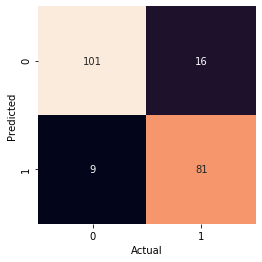

In [122]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
#print('confusion_matrix',mat)
names = np.unique(pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

* we have a accuracy of 87.92% from base logistic model along with CV.  want to use some binning of continous variables to see if any better results can be acheived

## Handling outliers
### Discretization of continous variables & then model building

In [127]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Income', 'Debt', 
                                                          'YearsEmployed','Approved',
                                                         'CreditScore','Employed',
                                                         'PriorDefault']],
                                                    data.Approved, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 8), (207, 8), (483,), (207,))

In [128]:
X_train.head() 

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault
596,46.08,4159,3.000,2.375,1,8,1,1
303,15.92,0,2.875,0.085,0,0,0,0
204,36.33,1187,2.125,0.085,1,1,1,1
351,22.17,0,0.585,0.000,0,0,0,0
118,57.83,1332,7.040,14.000,1,6,1,1


In [129]:
# example: build Classification tree using Age to predict Approved
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Approved)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_train.head(10)

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree
596,46.08,4159,3.000,2.375,1,8,1,1,0.604651
303,15.92,0,2.875,0.085,0,0,0,0,0.200000
204,36.33,1187,2.125,0.085,1,1,1,1,0.411602
351,22.17,0,0.585,0.000,0,0,0,0,0.411602
118,57.83,1332,7.040,14.000,1,6,1,1,0.604651
247,19.67,99,0.210,0.290,1,11,1,1,0.411602
652,22.50,0,0.415,0.335,0,0,0,0,0.411602
513,20.25,0,9.960,0.000,1,0,0,1,0.411602
230,25.17,7059,3.500,0.625,1,7,1,1,0.411602
250,40.25,1200,21.500,20.000,1,11,1,1,0.411602


In [130]:
X_train.Age_tree.unique()

array([0.60465116, 0.2       , 0.41160221, 0.8       ])

* A tree of depth 2, makes 2 splits, therefore generating 4 buckets, that is why we see 4 different probabilities in the output above.

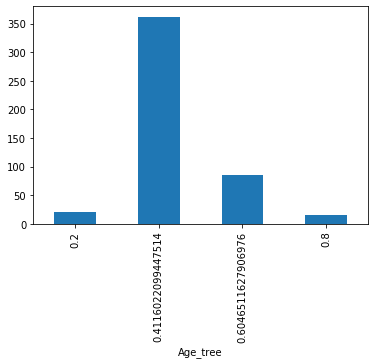

In [131]:
# number of customers per probabilistic bucket / bin

X_train.groupby(['Age_tree'])['Approved'].count().plot.bar()

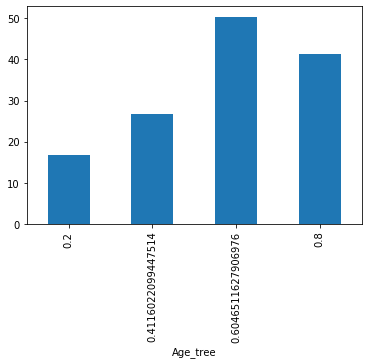

In [132]:
# median age within each bucket originated by the tree

X_train.groupby(['Age_tree'])['Age'].median().plot.bar()

In [133]:

# let's see the Age limits buckets generated by the tree
# by capturing the minimum and maximum age per each probability bucket, 
# we get an idea of the bucket cut-offs

pd.concat( [X_train.groupby(['Age_tree'])['Age'].min(),
            X_train.groupby(['Age_tree'])['Age'].max()], axis=1)

,Age,Age
Age_tree,,
0.200000,13.75,17.92
0.411602,18.00,40.92
0.604651,42.75,76.75
0.800000,41.00,42.50


* Thus, the decision tree generated the buckets: 13-17, 18-40, 41-42.5 and 42.75-76, with probabilities of credit card approval of .20, .41, .80 and .60 respectively.

In [134]:
# Transform the feature using tree
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Age.to_frame(), X_train.Approved)
X_train['Age_tree'] = tree_model.predict_proba(X_train.Age.to_frame())[:,1]
X_test['Age_tree'] = tree_model.predict_proba(X_test.Age.to_frame())[:,1]

In [135]:
# let's inspect the transformed variables in train set
X_train.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree
596,46.08,4159,3.000,2.375,1,8,1,1,0.604651
303,15.92,0,2.875,0.085,0,0,0,0,0.200000
204,36.33,1187,2.125,0.085,1,1,1,1,0.411602
351,22.17,0,0.585,0.000,0,0,0,0,0.411602
118,57.83,1332,7.040,14.000,1,6,1,1,0.604651


In [136]:
# let's inspect the transformed variables in test set

X_test.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree
14,45.83,0,10.50,5.000,1,7,1,1,0.604651
586,64.08,1000,20.00,17.500,1,9,1,1,0.604651
140,31.25,0,3.75,0.625,1,9,1,1,0.411602
492,39.25,4607,9.50,6.500,1,14,1,1,0.411602
350,26.17,1,2.00,0.000,0,0,0,0,0.411602


In [137]:
# and the unique values of each bin (train)
X_train.Age_tree.unique()

array([0.60465116, 0.2       , 0.41160221, 0.8       ])

In [138]:
# and the unique values of each bin (test)
X_test.Age_tree.unique()

array([0.60465116, 0.41160221, 0.2       , 0.8       ])

## Income

### Selecting the optimal tree depth

In [139]:
from sklearn.model_selection import cross_val_score
score_ls = []
score_std_ls = []
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Income.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.665520,0.041207
1,2,0.692894,0.063057
2,3,0.657221,0.033250
3,4,0.684705,0.049701


* the best split roc_auc is obtained with a tree of depth 2, thus can choose this one to proceed.

In [140]:
# train the decision tree and engineer Income in train and test set
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Income.to_frame(), X_train.Approved)
X_train['Income_tree'] = tree_model.predict_proba(X_train.Income.to_frame())[:,1]
X_test['Income_tree'] = tree_model.predict_proba(X_test.Income.to_frame())[:,1]

In [141]:
X_train['Income_tree'].unique()

array([0.75757576, 0.31940299, 1.        , 0.53333333])

In [142]:
X_test['Income_tree'].unique()

array([0.31940299, 0.75757576, 0.53333333, 1.        ])

In [143]:
# let's see what are the INcome cut-offs within each bin
pd.concat( [X_train.groupby(['Income_tree'])['Income'].min(),
            X_train.groupby(['Income_tree'])['Income'].max()], axis=1)

,Income,Income
Income_tree,,
0.319403,0,228
0.533333,234,484
0.757576,500,5552
1.000000,5777,51100


* The tree generated 4 bins: 0-228, 234-484, 500-5552 and 5777-51100, each with probability of cr.card approval .31, .53, .75 and 100 respectively. Indicating that people that higher income > 5777, where more likely to get credit card approval

In [144]:
# let's inspect the transformed variables in train set
X_train.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree
596,46.08,4159,3.000,2.375,1,8,1,1,0.604651,0.757576
303,15.92,0,2.875,0.085,0,0,0,0,0.200000,0.319403
204,36.33,1187,2.125,0.085,1,1,1,1,0.411602,0.757576
351,22.17,0,0.585,0.000,0,0,0,0,0.411602,0.319403
118,57.83,1332,7.040,14.000,1,6,1,1,0.604651,0.757576


In [145]:
X_test.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree
14,45.83,0,10.50,5.000,1,7,1,1,0.604651,0.319403
586,64.08,1000,20.00,17.500,1,9,1,1,0.604651,0.757576
140,31.25,0,3.75,0.625,1,9,1,1,0.411602,0.319403
492,39.25,4607,9.50,6.500,1,14,1,1,0.411602,0.757576
350,26.17,1,2.00,0.000,0,0,0,0,0.411602,0.319403


## Debt

In [146]:
score_ls = []
score_std_ls = []
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.Debt.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.620600,0.012318
1,2,0.608477,0.024578
2,3,0.586408,0.014928
3,4,0.592004,0.003634


In [147]:
# train the decision tree and engineer Debt in train and test set
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train.Debt.to_frame(), X_train.Approved)
X_train['Debt_tree'] = tree_model.predict_proba(X_train.Debt.to_frame())[:,1]
X_test['Debt_tree'] = tree_model.predict_proba(X_test.Debt.to_frame())[:,1]

In [148]:
X_train['Debt_tree'].unique()

array([0.30708661, 0.58959538, 0.58064516, 0.76      ])

In [149]:
X_test['Debt_tree'].unique()

array([0.58959538, 0.76      , 0.30708661, 0.58064516])

In [150]:
# let's see what are the INcome cut-offs within each bin
pd.concat( [X_train.groupby(['Debt_tree'])['Debt'].min(),
            X_train.groupby(['Debt_tree'])['Debt'].max()], axis=1)

,Debt,Debt
Debt_tree,,
0.307087,0.25,4.165
0.580645,0.00,0.210
0.589595,4.25,14.585
0.760000,14.79,28.000


In [151]:
# let's inspect the transformed variables in train set
X_train.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree,Debt_tree
596,46.08,4159,3.000,2.375,1,8,1,1,0.604651,0.757576,0.307087
303,15.92,0,2.875,0.085,0,0,0,0,0.200000,0.319403,0.307087
204,36.33,1187,2.125,0.085,1,1,1,1,0.411602,0.757576,0.307087
351,22.17,0,0.585,0.000,0,0,0,0,0.411602,0.319403,0.307087
118,57.83,1332,7.040,14.000,1,6,1,1,0.604651,0.757576,0.589595


In [152]:
# let's inspect the transformed variables in test set
X_test.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree,Debt_tree
14,45.83,0,10.50,5.000,1,7,1,1,0.604651,0.319403,0.589595
586,64.08,1000,20.00,17.500,1,9,1,1,0.604651,0.757576,0.760000
140,31.25,0,3.75,0.625,1,9,1,1,0.411602,0.319403,0.307087
492,39.25,4607,9.50,6.500,1,14,1,1,0.411602,0.757576,0.589595
350,26.17,1,2.00,0.000,0,0,0,0,0.411602,0.319403,0.307087


### YearsEmployed

In [153]:
score_ls = []
score_std_ls = []
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    scores = cross_val_score(tree_model, X_train.YearsEmployed.to_frame(), y_train, cv=3, scoring='roc_auc')
    score_ls.append(np.mean(scores))
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
temp

,depth,roc_auc_mean,roc_auc_std
0,1,0.669421,0.006232
1,2,0.690111,0.007895
2,3,0.695168,0.017291
3,4,0.703837,0.017154


* tree depth of 4

In [154]:
# train the decision tree and engineer YearsEmployed in train and test set
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train.YearsEmployed.to_frame(), X_train.Approved)
X_train['YearsEmployed_tree'] = tree_model.predict_proba(X_train.YearsEmployed.to_frame())[:,1]
X_test['YearsEmployed_tree'] = tree_model.predict_proba(X_test.YearsEmployed.to_frame())[:,1]

In [155]:
X_train['YearsEmployed_tree'].unique()

array([0.56842105, 0.38095238, 0.26086957, 1.        , 0.22077922,
       0.33333333, 0.        , 0.35555556, 0.1       , 0.775     ,
       0.41666667, 0.85714286, 0.6       ])

In [156]:
X_test['YearsEmployed_tree'].unique()

array([0.775     , 1.        , 0.33333333, 0.26086957, 0.22077922,
       0.56842105, 0.1       , 0.38095238, 0.85714286, 0.        ,
       0.35555556, 0.41666667, 0.6       ])

In [157]:
# let's see what are the YearsEmployed cut-offs within each bin
pd.concat( [X_train.groupby(['YearsEmployed_tree'])['YearsEmployed'].min(),
            X_train.groupby(['YearsEmployed_tree'])['YearsEmployed'].max()], axis=1)

,YearsEmployed,YearsEmployed
YearsEmployed_tree,,
0.000000,0.795,13.875
0.100000,0.125,0.165
0.220779,0.210,0.585
0.260870,0.000,0.000
0.333333,0.625,0.665
0.355556,0.835,1.250
0.380952,0.040,0.085
0.416667,1.500,1.585
0.568421,1.625,4.000


In [158]:
# let's inspect the transformed variables in train set
X_train.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree,Debt_tree,YearsEmployed_tree
596,46.08,4159,3.000,2.375,1,8,1,1,0.604651,0.757576,0.307087,0.568421
303,15.92,0,2.875,0.085,0,0,0,0,0.200000,0.319403,0.307087,0.380952
204,36.33,1187,2.125,0.085,1,1,1,1,0.411602,0.757576,0.307087,0.380952
351,22.17,0,0.585,0.000,0,0,0,0,0.411602,0.319403,0.307087,0.260870
118,57.83,1332,7.040,14.000,1,6,1,1,0.604651,0.757576,0.589595,1.000000


In [159]:
# let's inspect the transformed variables in train set
X_test.head()

,Age,Income,Debt,YearsEmployed,Approved,CreditScore,Employed,PriorDefault,Age_tree,Income_tree,Debt_tree,YearsEmployed_tree
14,45.83,0,10.50,5.000,1,7,1,1,0.604651,0.319403,0.589595,0.775000
586,64.08,1000,20.00,17.500,1,9,1,1,0.604651,0.757576,0.760000,1.000000
140,31.25,0,3.75,0.625,1,9,1,1,0.411602,0.319403,0.307087,0.333333
492,39.25,4607,9.50,6.500,1,14,1,1,0.411602,0.757576,0.589595,0.775000
350,26.17,1,2.00,0.000,0,0,0,0,0.411602,0.319403,0.307087,0.260870


In [160]:
del X_train['Age']
del X_train['Income']
del X_train['Debt']
del X_train['YearsEmployed']
del X_train['Approved']
del X_test['Age']
del X_test['Income']
del X_test['Debt']
del X_test['YearsEmployed']
del X_test['Approved']

In [161]:
X_train.shape

(483, 7)

In [162]:
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

The Shape of X_TRAIN is (483, 7)
The Shape of X_TEST is (207, 7)
The Shape of Y_TRAIN is (483,)
The Shape of Y_TEST is (207,)


## Compare classification algorithms

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [164]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [165]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state='seed')    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.865306 (0.048317)
KNN: 0.852891 (0.062741)
DTree: 0.842517 (0.082928)
NB: 0.869558 (0.040266)
ADA: 0.846599 (0.056458)
RF: 0.861054 (0.068526)
XGB: 0.869345 (0.052728)


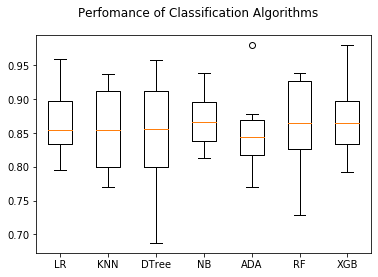

In [166]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

### XGBoost Classifier after discreterization of continous variables


In [167]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

y_pred = xgb_model.predict(X_test) # make predictions for test data 

print(confusion_matrix(y_test, y_pred))
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

xgb train roc-auc: 0.9685735075014725
xgb test roc-auc: 0.9112060778727444
[[100  17]
 [ 22  68]]
Accuracy: 81.16%


confusion_matrix [[100  17]
 [ 22  68]]


Text(91.68, 0.5, 'Predicted')

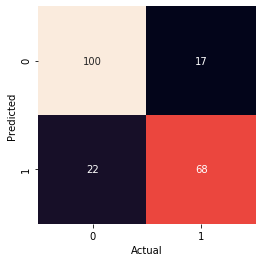

In [168]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
print('confusion_matrix',mat)
names = np.unique(y_pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [169]:
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.80      0.76      0.78        90

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207

confusion matrix: 
[[100  17]
 [ 22  68]]


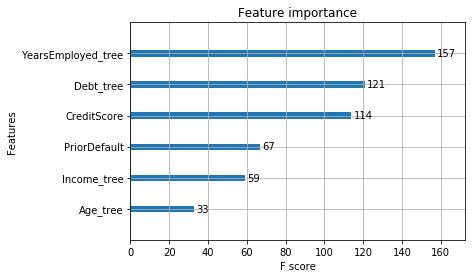

In [170]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_model)
plt.show()  

In [171]:
#adapted from https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=7, Accuracy: 81.16%
Thresh=0.020, n=6, Accuracy: 81.16%
Thresh=0.039, n=5, Accuracy: 80.68%
Thresh=0.039, n=4, Accuracy: 83.09%
Thresh=0.050, n=3, Accuracy: 84.54%
Thresh=0.105, n=2, Accuracy: 85.99%
Thresh=0.747, n=1, Accuracy: 85.99%


### Gaussian Naive Bayse after handling outliers using discretization of continous variables

In [172]:
# Init the Gaussian Classifier
model = GaussianNB()
# Train the model 
model.fit(X_train, y_train)
# Predict Output 
pred = model.predict(X_test)
print('predicted by model',(pred[1:20,]))

predicted by model [1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1]


confusion_matrix [[102  15]
 [ 22  68]]


Text(91.68, 0.5, 'Predicted')

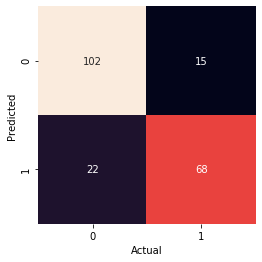

In [173]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
print('confusion_matrix',mat)
names = np.unique(pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [174]:
# summarize the fit of the model
from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       117
           1       0.82      0.76      0.79        90

    accuracy                           0.82       207
   macro avg       0.82      0.81      0.82       207
weighted avg       0.82      0.82      0.82       207

confusion matrix: 
[[102  15]
 [ 22  68]]


AUC: 0.8136752136752137


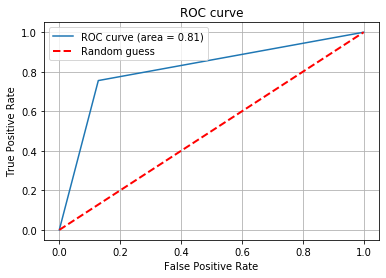

In [175]:
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [176]:
# comparing the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred.flatten()})
df1 = df.head(25)
print(df1)

     Actual  Predicted
14        1          1
586       1          1
140       1          1
492       1          1
350       0          0
672       0          0
501       1          1
342       0          0
312       0          0
412       0          0
1         1          1
31        1          1
403       0          0
449       0          0
514       1          0
374       0          0
523       0          1
231       1          1
548       1          1
252       1          1
598       1          0
682       0          0
229       1          0
75        0          1
675       0          0


### Obervation: Logistic Regression with Grid CV without discretization of continous variables has given better accuracy of nearing 88%